In [1]:
# Data setup (Titanic Dataset)
import pandas as pd
import numpy as np

np.random.seed(42)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print(df.shape)
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


# 🎯 1. Basic Pivot Tables
## Example 1: Simple Pivot Table - Survival Rate by Class

In [2]:
# Basic pivot: Survival rate by passenger class
pivot_simple = pd.pivot_table(
    data=df,
    values='Survived',
    index='Pclass',
    aggfunc='mean'
).round(3)

print("Simple Pivot Table - Survival Rate by Class:")
print(pivot_simple)
print("\n" + "="*60)

Simple Pivot Table - Survival Rate by Class:
        Survived
Pclass          
1          0.630
2          0.473
3          0.242



# Example 2: Pivot with Row and Column Dimensions

In [3]:
# 2D pivot: Survival rate by class and gender
pivot_2d = pd.pivot_table(
    data=df,
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
).round(3)

print("2D Pivot Table - Survival Rate by Class and Gender:")
print(pivot_2d)
print("\n" + "="*60)

2D Pivot Table - Survival Rate by Class and Gender:
Sex     female   male
Pclass               
1        0.968  0.369
2        0.921  0.157
3        0.500  0.135



# 📈 2. Advanced Pivot Table Configurations
## Example 3: Multiple Aggregation Functions

In [4]:
# Multiple aggregations on same value
pivot_multi_agg = pd.pivot_table(
    data=df,
    values='Fare',
    index='Pclass',
    columns='Survived',
    aggfunc=['mean', 'median', 'count', 'std']
).round(2)

print("Pivot with Multiple Aggregation Functions:")
print(pivot_multi_agg)
print("\n" + "="*60)

Pivot with Multiple Aggregation Functions:
           mean        median        count         std       
Survived      0      1      0      1     0    1      0      1
Pclass                                                       
1         64.68  95.61  44.75  77.96    80  136  60.66  85.29
2         19.41  22.06  13.00  21.00    97   87  15.31  10.85
3         13.67  13.69   8.05   8.52   372  119  12.12  10.69



# Example 4: Multiple Value Columns

In [5]:
# Analyze multiple metrics
pivot_multi_values = pd.pivot_table(
    data=df,
    values=['Survived', 'Fare', 'Age'],
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
).round(2)

print("Pivot Table with Multiple Value Columns:")
print(pivot_multi_values)
print("\n" + "="*60)

Pivot Table with Multiple Value Columns:
          Age           Fare        Survived      
Sex    female   male  female   male   female  male
Pclass                                            
1       34.61  41.28  106.13  67.23     0.97  0.37
2       28.72  30.74   21.97  19.74     0.92  0.16
3       21.75  26.51   16.12  12.66     0.50  0.14



# 🔄 3. Cross-Tabulations (Cross-Tabs)
## Example 5: Basic Cross-Tabulation

In [6]:
# Simple cross-tab: Count of passengers by class and survival
crosstab_simple = pd.crosstab(
    index=df['Pclass'],
    columns=df['Survived'],
    margins=True,
    margins_name='Total'
)

print("Cross-Tabulation: Passenger Count by Class and Survival:")
print(crosstab_simple)
print("\n" + "="*60)

Cross-Tabulation: Passenger Count by Class and Survival:
Survived    0    1  Total
Pclass                   
1          80  136    216
2          97   87    184
3         372  119    491
Total     549  342    891



# 📊 4. Multi-Dimensional Cross-Tabs
## Example 7: Three-Way Cross-Tabulation

In [7]:
# Three-way cross-tab
crosstab_3d = pd.crosstab(
    index=[df['Pclass'], df['Sex']],
    columns=df['Survived'],
    margins=True,
    margins_name='Total'
)

print("Three-Way Cross-Tabulation (Class × Gender × Survival):")
print(crosstab_3d)
print("\n" + "="*60)

Three-Way Cross-Tabulation (Class × Gender × Survival):
Survived         0    1  Total
Pclass Sex                    
1      female    3   91     94
       male     77   45    122
2      female    6   70     76
       male     91   17    108
3      female   72   72    144
       male    300   47    347
Total          549  342    891



# Example 8: Cross-Tab with Aggregation

In [8]:
# Cross-tab with value aggregation
crosstab_values = pd.crosstab(
    index=df['Pclass'],
    columns=df['Sex'],
    values=df['Age'],
    aggfunc='mean',
    margins=True,
    margins_name='Average'
).round(1)

print("Cross-Tabulation with Value Aggregation (Average Age):")
print(crosstab_values)
print("\n" + "="*60)

Cross-Tabulation with Value Aggregation (Average Age):
Sex      female  male  Average
Pclass                        
1          34.6  41.3     38.2
2          28.7  30.7     29.9
3          21.8  26.5     25.1
Average    27.9  30.7     29.7



# 🎨 5. Practical Business Analysis Examples
## Example 9: Revenue Analysis Pivot Table

In [9]:
# Create fare categories for analysis
df['Fare_Category'] = pd.cut(df['Fare'], 
                             bins=[0, 10, 30, 100, 600],
                             labels=['Budget', 'Economy', 'Premium', 'Luxury'])

# Pivot table for revenue analysis
revenue_pivot = pd.pivot_table(
    data=df,
    values=['Fare', 'PassengerId'],
    index=['Pclass', 'Fare_Category'],
    columns='Survived',
    aggfunc={
        'Fare': ['sum', 'mean', 'count'],
        'PassengerId': 'count'
    },
    fill_value=0
).round(2)

print("Revenue Analysis Pivot Table:")
print(revenue_pivot)
print("\n" + "="*60)

C:\Users\touhi\AppData\Local\Temp\ipykernel_11436\3745477109.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  revenue_pivot = pd.pivot_table(


Revenue Analysis Pivot Table:
                      Fare                                       PassengerId  \
                     count        mean              sum                count   
Survived                 0   1       0       1        0        1           0   
Pclass Fare_Category                                                           
1      Budget            1   0    5.00    0.00     5.00     0.00           1   
       Economy          20  21   27.34   27.30   546.89   573.21          20   
       Premium          40  76   53.92   65.56  2156.83  4982.74          40   
       Luxury           14  39  176.14  190.94  2466.00  7446.74          14   
2      Budget            0   0    0.00    0.00     0.00     0.00           0   
       Economy          80  74   16.23   18.73  1298.09  1386.36          80   
       Premium          11  13   53.17   40.96   584.90   532.48          11   
       Luxury            0   0    0.00    0.00     0.00     0.00           0   
3      Bud

# Example 10: Family Survival Analysis

In [10]:
# Create family size categories
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Type'] = pd.cut(df['Family_Size'],
                          bins=[-1, 0, 3, 10],
                          labels=['Alone', 'Small Family', 'Large Family'])

# Cross-tab for family survival analysis
family_crosstab = pd.crosstab(
    index=[df['Pclass'], df['Family_Type']],
    columns=df['Survived'],
    values=df['Age'],
    aggfunc=['mean', 'count'],
    margins=True,
    margins_name='Total'
).round(2)

print("Family Survival Analysis Cross-Tab:")
print(family_crosstab)
print("\n" + "="*60)

Family Survival Analysis Cross-Tab:
                      mean               count           
Survived                 0      1  Total     0    1 Total
Pclass Family_Type                                       
1      Alone         47.59  36.49  41.01    35   51    86
       Small Family  38.81  35.34  36.34    27   67    94
       Large Family  41.50  21.50  28.17     2    4     6
2      Alone         33.89  33.45  33.74    61   32    93
       Small Family  32.83  20.44  25.04    29   49    78
       Large Family    NaN  39.00  39.00     0    2     2
3      Alone         28.93  25.62  28.24   178   47   225
       Small Family  26.81  14.35  21.94    53   34    87
       Large Family  15.38  15.75  15.42    39    4    43
Total                30.63  28.34  29.70   424  290   714



# 📊 6. Advanced Pivot Table Features
## Example 11: Pivot Table with Custom Aggregation

In [11]:
# Define custom aggregation functions
def survival_rate(series):
    return f"{series.mean() * 100:.1f}%"

def fare_per_survivor(group):
    """Average fare per survivor in group"""
    total_fare = group['Fare'].sum()
    survivors = group['Survived'].sum()
    return total_fare / survivors if survivors > 0 else 0

# Using pivot_table with custom functions
advanced_pivot = pd.pivot_table(
    data=df,
    values=['Survived', 'Fare', 'Age'],
    index='Pclass',
    columns='Sex',
    aggfunc={
        'Survived': ['count', 'sum', survival_rate],
        'Fare': ['mean', 'median', 'max'],
        'Age': ['mean', 'min', 'max']
    }
).round(2)

print("Advanced Pivot Table with Custom Aggregations:")
print(advanced_pivot)
print("\n" + "="*60)

Advanced Pivot Table with Custom Aggregations:
          Age                                     Fare                         \
          max         mean           min           max            mean          
Sex    female  male female   male female  male  female    male  female   male   
Pclass                                                                          
1        63.0  80.0  34.61  41.28   2.00  0.92  512.33  512.33  106.13  67.23   
2        57.0  70.0  28.72  30.74   2.00  0.67   65.00   73.50   21.97  19.74   
3        63.0  74.0  21.75  26.51   0.75  0.42   69.55   69.55   16.12  12.66   

                     Survived                                        
       median           count         sum      survival_rate         
Sex    female   male   female male female male        female   male  
Pclass                                                               
1       82.66  41.26       94  122     91   45         96.8%  36.9%  
2       22.00  13.00       76  108 

# Example 12: Pivot Table with Missing Data Handling

In [12]:
# Pivot with missing value handling
pivot_missing = pd.pivot_table(
    data=df,
    values='Age',
    index='Pclass',
    columns='Survived',
    aggfunc='mean',
    fill_value=0,  # Fill NaN with 0
    dropna=False   # Keep NaN in aggregation
).round(1)

print("Pivot Table with Missing Data Handling:")
print(pivot_missing)
print("\n")

# Show missing data pattern
missing_analysis = pd.crosstab(
    index=df['Pclass'],
    columns=df['Survived'],
    values=df['Age'].isna(),
    aggfunc='sum',
    margins=True
)

print("Missing Age Data Pattern:")
print(missing_analysis)
print("\n" + "="*60)

Pivot Table with Missing Data Handling:
Survived     0     1
Pclass              
1         43.7  35.4
2         33.5  25.9
3         26.6  20.6


Missing Age Data Pattern:
Survived    0   1  All
Pclass                
1          16  14   30
2           7   4   11
3         102  34  136
All       125  52  177



# 🔄 7. Pivot Table vs Cross-Tab Comparison
## Example 13: Side-by-Side Comparison

In [13]:
# Same analysis with pivot_table and crosstab
print("COMPARISON: Pivot Table vs Cross-Tab")
print("-" * 40)

# Using pivot_table
pivot_result = pd.pivot_table(
    data=df,
    values='PassengerId',
    index='Pclass',
    columns='Embarked',
    aggfunc='count',
    fill_value=0
)

print("Using pivot_table():")
print(pivot_result)
print("\n")

# Using crosstab
crosstab_result = pd.crosstab(
    index=df['Pclass'],
    columns=df['Embarked'],
    margins=False
)

print("Using crosstab():")
print(crosstab_result)
print("\n" + "="*60)

# Show they're equivalent
print("Are they equivalent?", pivot_result.equals(crosstab_result))
print("\n" + "="*60)

COMPARISON: Pivot Table vs Cross-Tab
----------------------------------------
Using pivot_table():
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


Using crosstab():
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353

Are they equivalent? True



# 📈 8. Visualization of Pivot Tables

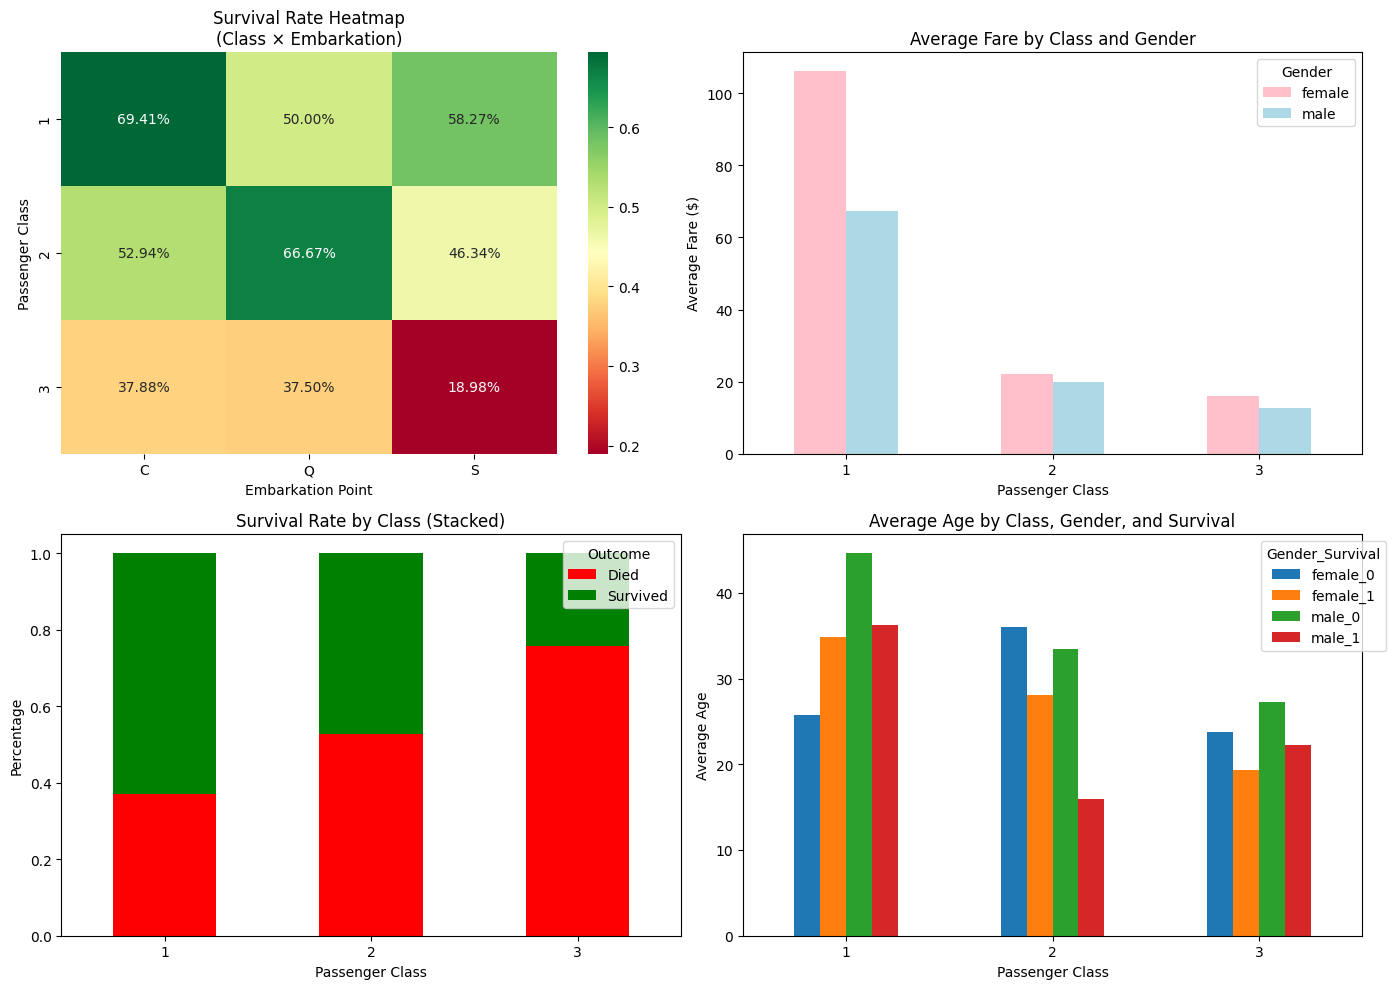

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create pivot tables for visualization
survival_pivot = pd.pivot_table(
    data=df,
    values='Survived',
    index='Pclass',
    columns='Embarked',
    aggfunc='mean'
).fillna(0)

fare_pivot = pd.pivot_table(
    data=df,
    values='Fare',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Heatmap of survival rates
sns.heatmap(survival_pivot, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate Heatmap\n(Class × Embarkation)')
axes[0, 0].set_xlabel('Embarkation Point')
axes[0, 0].set_ylabel('Passenger Class')

# 2. Bar chart from pivot table
fare_pivot.plot(kind='bar', ax=axes[0, 1], color=['pink', 'lightblue'])
axes[0, 1].set_title('Average Fare by Class and Gender')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Average Fare ($)')
axes[0, 1].legend(title='Gender')
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Stacked bar from cross-tab
crosstab_viz = pd.crosstab(
    index=df['Pclass'],
    columns=df['Survived'],
    normalize='index'
)
crosstab_viz.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                  color=['red', 'green'])
axes[1, 0].set_title('Survival Rate by Class (Stacked)')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(['Died', 'Survived'], title='Outcome')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Grouped bar from multi-level pivot
age_pivot = pd.pivot_table(
    data=df,
    values='Age',
    index='Pclass',
    columns=['Sex', 'Survived'],
    aggfunc='mean'
).round(1)

# Flatten columns for plotting
age_pivot.columns = ['_'.join(map(str, col)).replace('.0', '') 
                     for col in age_pivot.columns]
age_pivot.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Age by Class, Gender, and Survival')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Average Age')
axes[1, 1].legend(title='Gender_Survival', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()